
Data Status
-------------------------------
Batch Shape of Training Features: (1, 64, 64, 32) torch.float32
Batch Shape of Training Labels: (1, 64, 64, 32) torch.float32

Testing After Random Initialization
-------------------------------
Batch: 1/4
Batch: 2/4
Batch: 3/4
Batch: 4/4
Total Loss: 0.7420305013656616

Loading Pretrained Model
-------------------------------
=> Loading checkpoint

Testing After Loading Pretrained Weights
-------------------------------
Batch: 1/4
Batch: 2/4
Batch: 3/4
Batch: 4/4
Total Loss: 0.0844762846827507

Training
-------------------------------
Epoch 1
-------------------------------
Batch: 1/4


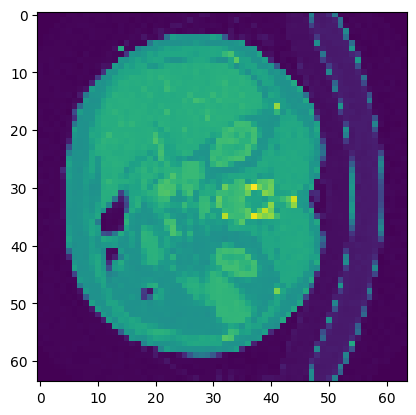

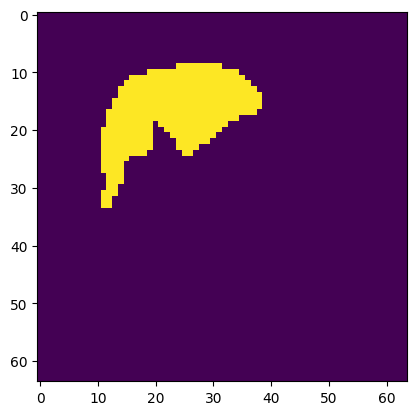

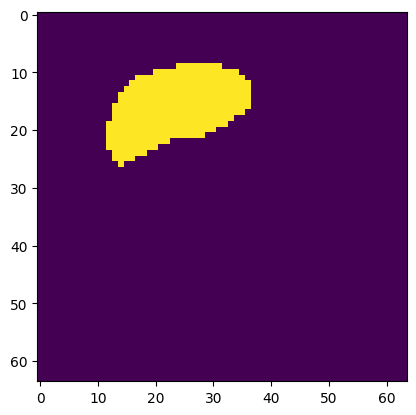

(32, 1, 64, 64) (32, 1, 64, 64)
tensor(0.0413)
Batch: 2/4


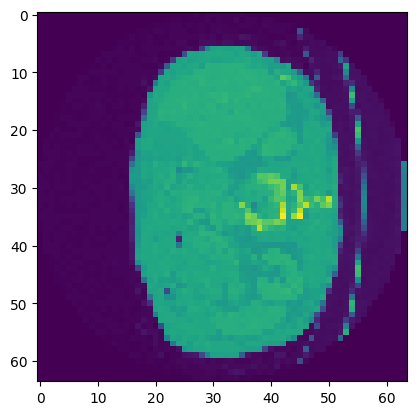

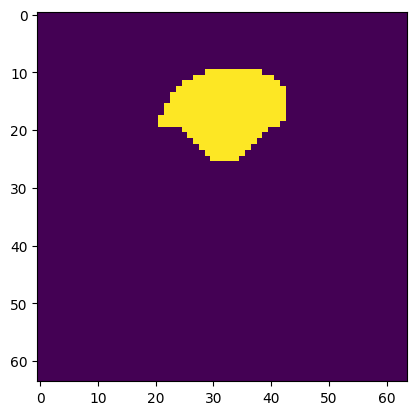

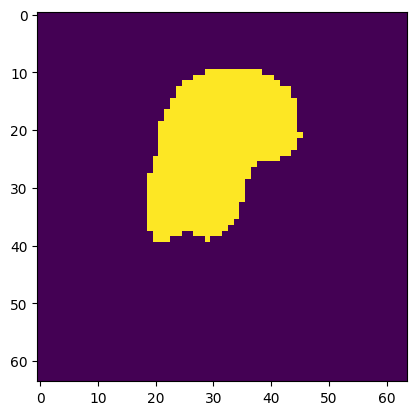

(32, 1, 64, 64) (32, 1, 64, 64)
tensor(0.1210)
Batch: 3/4


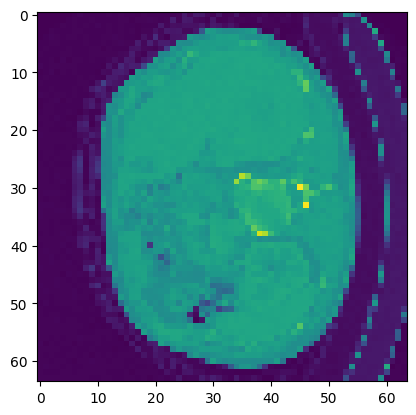

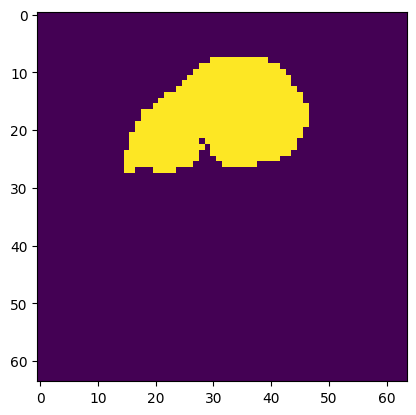

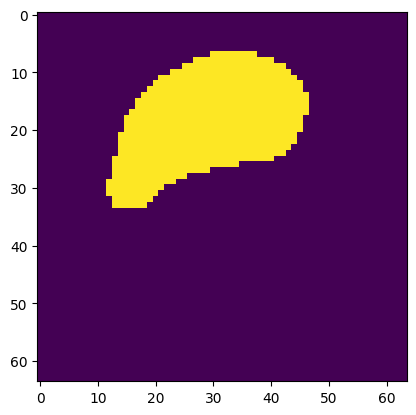

(32, 1, 64, 64) (32, 1, 64, 64)
tensor(0.0785)


KeyboardInterrupt: 

In [1]:
import unet
import losses
import engine
import torch
import json
import unet2d 
from torch import nn


class NeuralNetwork(unet2d.UNET,engine.Engine):
    def __init__(self):
        engine.Engine.__init__(self)
        unet2d.UNET.__init__(self)


with open('../config/configs.json') as f:
    config = json.load(f)


model=NeuralNetwork()
# losses.LossFunctions.choose(config["loss_function"])
# nn.BCEWithLogitsLoss()
model.compile(loss= nn.BCEWithLogitsLoss(), optimizer= torch.optim.Adam(model.parameters(),lr=config['optimizer']['learning_rate']), metrics=['dice_score','loss'])
# print("Compile Status")
# print("-------------------------------")
# model.compile_status()

model.load_data(dataset_path=config['dataset']['Barbary'],transformation_flag=True,transformation=config['transformation_size'],batchsize=config['batch_size'],test_size=0)
print("\nData Status")
print("-------------------------------")
model.data_status()

print("\nTesting After Random Initialization")
print("-------------------------------")
model.evaluate_train2d()

print("\nLoading Pretrained Model")
print("-------------------------------")
model.load_checkpoint(config['checkpoint'])

print("\nTesting After Loading Pretrained Weights")
print("-------------------------------")
model.evaluate_train2d()

print("\nTraining")
print("-------------------------------")
model.fit2d(epochs=config['epochs'])

print("\nTesting After Training")
print("-------------------------------")
model.evaluate_train2d()

In [ ]:
import torch

print("\nPrediction")
print("-------------------------------")
ImagePath=config['PredictPath']
# Image=torch.asarray(nib.load(ImagePath).get_fdata())
output=model.pred2d(ImagePath)
print(output.shape)


Prediction
-------------------------------
batch: 1/1
(1, 1, 1, 64, 64, 64)


In [ ]:
import numpy as np
import nibabel as nib

ni_img = nib.Nifti1Image(np.asarray(output[0][0][0]), affine=np.eye(4))
nib.save(ni_img, "nifti_prediction.nii")

In [2]:
# # if model is better uncomment this line
# model.save_checkpoint(config['checkpoint'])

=> Saving checkpoint
